# CONVOLUTION NEURAL NETWORK
## 🌭 **Hotdog or Not Hotdog?** 🍔

<img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzRlbDJmZ3phaWFscHpmdHN4dzdtbGZpN2RqY3BvOGt3ajVueXdzaSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/26FmQcjUrHfNjKQGA/giphy.gif" width="800">


In [ ]:
# @title Dependencies

!pip install torch
!pip install torchvision
!pip install datasets

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import math

from datasets import load_dataset

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# @title Training device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/50 [00:00<?, ?it/s]

10397836.jpg:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

12180546.jpg:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

11161358.jpg:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

12123657.jpg:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

1848975.jpg:   0%|          | 0.00/5.61k [00:00<?, ?B/s]

12123663.jpg:   0%|          | 0.00/5.78k [00:00<?, ?B/s]

13354490.jpg:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

12123655.jpg:   0%|          | 0.00/5.71k [00:00<?, ?B/s]

2126578.jpg:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

1275692.jpg:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

12573394.jpg:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

10020170.jpg:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

1857729.jpg:   0%|          | 0.00/8.97k [00:00<?, ?B/s]

11370057.jpg:   0%|          | 0.00/8.54k [00:00<?, ?B/s]

3023479.jpg:   0%|          | 0.00/9.26k [00:00<?, ?B/s]

4113467.jpg:   0%|          | 0.00/8.67k [00:00<?, ?B/s]

4113461.jpg:   0%|          | 0.00/5.45k [00:00<?, ?B/s]

4113456.jpg:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

2261197.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

3162040.jpg:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

4113469.jpg:   0%|          | 0.00/9.55k [00:00<?, ?B/s]

2204769.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

4113470.jpg:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

4113465.jpg:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

11306883.jpg:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

4113471.jpg:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

4113466.jpg:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

4113498.jpg:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

13354572.jpg:   0%|          | 0.00/8.60k [00:00<?, ?B/s]

4113500.jpg:   0%|          | 0.00/8.35k [00:00<?, ?B/s]

4113503.jpg:   0%|          | 0.00/9.49k [00:00<?, ?B/s]

4113505.jpg:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

4518638.jpg:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

4518639.jpg:   0%|          | 0.00/3.02k [00:00<?, ?B/s]

4518640.jpg:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

4518643.jpg:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

4518647.jpg:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

4518646.jpg:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

4518642.jpg:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

4518644.jpg:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

4518645.jpg:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

4518641.jpg:   0%|          | 0.00/3.19k [00:00<?, ?B/s]

4518653.jpg:   0%|          | 0.00/7.86k [00:00<?, ?B/s]

4518648.jpg:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

4518655.jpg:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

4518656.jpg:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

4113468.jpg:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

4518657.jpg:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

4518649.jpg:   0%|          | 0.00/3.61k [00:00<?, ?B/s]

4637737.jpg:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

4113502.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

4551906.jpg:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

4637765.jpg:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

4676409.jpg:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

4676407.jpg:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

4637756.jpg:   0%|          | 0.00/5.60k [00:00<?, ?B/s]

4637735.jpg:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

4637755.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

4676419.jpg:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

5093845.jpg:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

4676422.jpg:   0%|          | 0.00/5.70k [00:00<?, ?B/s]

5093861.jpg:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

4676414.jpg:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

5093853.jpg:   0%|          | 0.00/7.85k [00:00<?, ?B/s]

5093859.jpg:   0%|          | 0.00/7.92k [00:00<?, ?B/s]

5093855.jpg:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

5093856.jpg:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

5225480.jpg:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

5225476.jpg:   0%|          | 0.00/5.87k [00:00<?, ?B/s]

5584276.jpg:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

5584277.jpg:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

5200735.jpg:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

5093862.jpg:   0%|          | 0.00/5.27k [00:00<?, ?B/s]

5584280.jpg:   0%|          | 0.00/9.24k [00:00<?, ?B/s]

5584279.jpg:   0%|          | 0.00/8.50k [00:00<?, ?B/s]

5584281.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

5589854.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

5779743.jpg:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

6441795.jpg:   0%|          | 0.00/9.52k [00:00<?, ?B/s]

6941114.jpg:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

7159295.jpg:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

6940995.jpg:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

7974806.jpg:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

6540061.jpg:   0%|          | 0.00/9.09k [00:00<?, ?B/s]

8262468.jpg:   0%|          | 0.00/9.58k [00:00<?, ?B/s]

8277759.jpg:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

8287713.jpg:   0%|          | 0.00/9.56k [00:00<?, ?B/s]

8523140.jpg:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

8287715.jpg:   0%|          | 0.00/8.96k [00:00<?, ?B/s]

8488077.jpg:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

772515.jpg:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

8522785.jpg:   0%|          | 0.00/9.62k [00:00<?, ?B/s]

8522778.jpg:   0%|          | 0.00/9.10k [00:00<?, ?B/s]

8523482.jpg:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

8523532.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

8523538.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

8803705.jpg:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

9169241.jpg:   0%|          | 0.00/5.54k [00:00<?, ?B/s]

929137.jpg:   0%|          | 0.00/8.51k [00:00<?, ?B/s]

9304021.jpg:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

1059905.jpg:   0%|          | 0.00/8.65k [00:00<?, ?B/s]

106343.jpg:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

1109197.jpg:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

1099680.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

109641.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

1028599.jpg:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

1059943.jpg:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

1079020.jpg:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

1001773.jpg:   0%|          | 0.00/9.66k [00:00<?, ?B/s]

1108117.jpg:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

1092730.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

1128678.jpg:   0%|          | 0.00/9.19k [00:00<?, ?B/s]

115740.jpg:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

1196516.jpg:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

1143754.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

1194431.jpg:   0%|          | 0.00/5.46k [00:00<?, ?B/s]

1199957.jpg:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

1251198.jpg:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

1199960.jpg:   0%|          | 0.00/5.61k [00:00<?, ?B/s]

1337825.jpg:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

1211887.jpg:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

1267320.jpg:   0%|          | 0.00/9.79k [00:00<?, ?B/s]

1279330.jpg:   0%|          | 0.00/9.14k [00:00<?, ?B/s]

1351238.jpg:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

1395958.jpg:   0%|          | 0.00/9.79k [00:00<?, ?B/s]

1400172.jpg:   0%|          | 0.00/9.37k [00:00<?, ?B/s]

1391487.jpg:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

1414651.jpg:   0%|          | 0.00/9.42k [00:00<?, ?B/s]

1410235.jpg:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

1410236.jpg:   0%|          | 0.00/9.23k [00:00<?, ?B/s]

1435735.jpg:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

142520.jpg:   0%|          | 0.00/5.99k [00:00<?, ?B/s]

1251208.jpg:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

1435904.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

1639556.jpg:   0%|          | 0.00/5.79k [00:00<?, ?B/s]

1510690.jpg:   0%|          | 0.00/10.9k [00:00<?, ?B/s]

1566837.jpg:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

1438672.jpg:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

1583884.jpg:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

1640774.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

1639562.jpg:   0%|          | 0.00/5.12k [00:00<?, ?B/s]

1437267.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

1660030.jpg:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

1640770.jpg:   0%|          | 0.00/8.75k [00:00<?, ?B/s]

1640772.jpg:   0%|          | 0.00/13.4k [00:00<?, ?B/s]

1640777.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

196643.jpg:   0%|          | 0.00/9.53k [00:00<?, ?B/s]

1482803.jpg:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

205961.jpg:   0%|          | 0.00/11.0k [00:00<?, ?B/s]

239581.jpg:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

248413.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

262967.jpg:   0%|          | 0.00/9.49k [00:00<?, ?B/s]

299347.jpg:   0%|          | 0.00/5.14k [00:00<?, ?B/s]

291528.jpg:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

326281.jpg:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

262978.jpg:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

323682.jpg:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

327098.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

361184.jpg:   0%|          | 0.00/8.69k [00:00<?, ?B/s]

410648.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

357756.jpg:   0%|          | 0.00/9.11k [00:00<?, ?B/s]

376464.jpg:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

372851.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

414262.jpg:   0%|          | 0.00/5.23k [00:00<?, ?B/s]

416471.jpg:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

397913.jpg:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

434283.jpg:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

45908.jpg:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

539451.jpg:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

557659.jpg:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

461198.jpg:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

568370.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

51312.jpg:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

693267.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

628776.jpg:   0%|          | 0.00/9.59k [00:00<?, ?B/s]

541216.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

574111.jpg:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

61180.jpg:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

566566.jpg:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

691114.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

70497.jpg:   0%|          | 0.00/8.70k [00:00<?, ?B/s]

616401.jpg:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

708488.jpg:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

718742.jpg:   0%|          | 0.00/9.08k [00:00<?, ?B/s]

750073.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

769289.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

784633.jpg:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

793785.jpg:   0%|          | 0.00/9.54k [00:00<?, ?B/s]

769290.jpg:   0%|          | 0.00/9.28k [00:00<?, ?B/s]

916925.jpg:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

936611.jpg:   0%|          | 0.00/8.96k [00:00<?, ?B/s]

808941.jpg:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

842545.jpg:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

941869.jpg:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

958545.jpg:   0%|          | 0.00/9.56k [00:00<?, ?B/s]

769969.jpg:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

803963.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

302899.jpg:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

920220.jpg:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

699953.jpg:   0%|          | 0.00/11.1k [00:00<?, ?B/s]

15634638.jpg:   0%|          | 0.00/14.0k [00:00<?, ?B/s]

13684067.jpg:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

19325451.jpg:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

17530297.jpg:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

17778859.jpg:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

14007235.jpg:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

18908092.jpg:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

13355622.jpg:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

17778862.jpg:   0%|          | 0.00/9.91k [00:00<?, ?B/s]

18396045.jpg:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

19372128.jpg:   0%|          | 0.00/5.06k [00:00<?, ?B/s]

17492347.jpg:   0%|          | 0.00/9.85k [00:00<?, ?B/s]

16121290.jpg:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

19065713.jpg:   0%|          | 0.00/5.65k [00:00<?, ?B/s]

19065711.jpg:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

16121289.jpg:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

25388980.jpg:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

25388989.jpg:   0%|          | 0.00/9.11k [00:00<?, ?B/s]

23833917.jpg:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

25388983.jpg:   0%|          | 0.00/8.93k [00:00<?, ?B/s]

25388992.jpg:   0%|          | 0.00/9.77k [00:00<?, ?B/s]

25388984.jpg:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

19922919.jpg:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

1860204.jpg:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

25389018.jpg:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

25389020.jpg:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

1893556.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

1907244.jpg:   0%|          | 0.00/3.94k [00:00<?, ?B/s]

1998920.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

1860208.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

1775043.jpg:   0%|          | 0.00/4.85k [00:00<?, ?B/s]

2097090.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

2286776.jpg:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

2147491.jpg:   0%|          | 0.00/13.7k [00:00<?, ?B/s]

2228559.jpg:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

2280545.jpg:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

2641886.jpg:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

2983099.jpg:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

2762942.jpg:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

3434523.jpg:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

2983101.jpg:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

3338497.jpg:   0%|          | 0.00/5.36k [00:00<?, ?B/s]

2899682.jpg:   0%|          | 0.00/12.8k [00:00<?, ?B/s]

3186654.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

3026808.jpg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

3026805.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

3338681.jpg:   0%|          | 0.00/9.50k [00:00<?, ?B/s]

3655916.jpg:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

3789885.jpg:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

3659862.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Repo card metadata block was not found. Setting CardData to empty.


Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Using the latest cached version of the dataset since truepositive/hotdog_nothotdog couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /root/.cache/huggingface/datasets/truepositive___hotdog_nothotdog/default/0.0.0/c719396d87a52102a78a683ac4394086a4a7190a (last modified on Thu Apr 24 17:45:47 2025).


Map:   0%|          | 0/50 [00:00<?, ? examples/s]

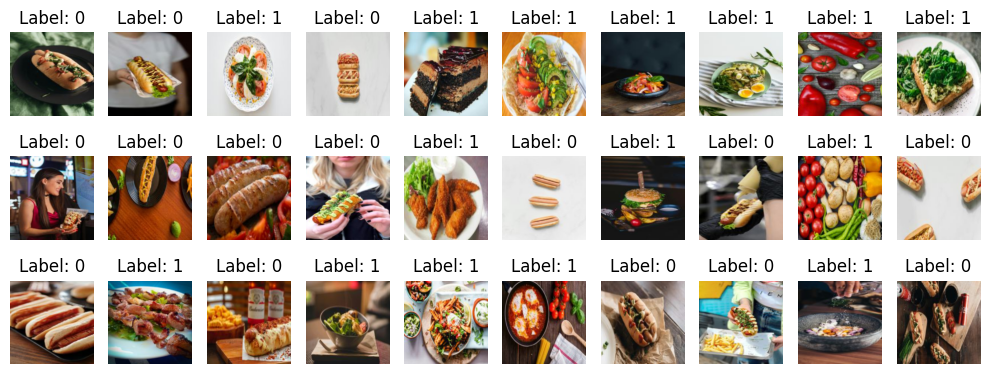

In [ ]:
# @title Dataset

dataset = load_dataset("truepositive/hotdog_nothotdog", split="train")

# Transform to convert PIL images to tensors and normalize them
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),  # Converts to C x H x W and scales to [0, 1]
])

def apply_transform(example):
    example['image'] = transform(example['image'])
    return example

dataset = dataset.map(apply_transform)

# Set dataset format to return PyTorch tensors
dataset.set_format(type='torch', columns=['image', 'label'])

val_dataset = load_dataset("truepositive/hotdog_nothotdog", split="validation")
val_dataset = val_dataset.map(apply_transform)
val_dataset.set_format(type='torch', columns=['image', 'label'])

# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True)

# Helper to visualize some images
def show_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 4))
    for i in range(30):
        plt.subplot(3, 10, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())
        title = f"Label: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
sample = next(iter(train_loader))
show_images(sample['image'], sample['label'].numpy())

In [ ]:
# @title Network architecture

class HotdogNet(nn.Module):
    def __init__(self):
      super().__init__()
      # 3 * 150 * 150 → 65 * 75 * 75
      self.block1 = nn.Sequential(
          nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      # 64 * 75 * 75 → 128 * 37 * 37
      self.block2 = nn.Sequential(
          nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(2, 2),
      )

      # 128 * 38 * 38 → 256 * 18 * 18
      self.block3 = nn.Sequential(
          nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
          nn.BatchNorm2d(256),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2),
      )

      # Flatten: 256 * 18 * 18 = 82944
      # 82944 → 128
      # 128 → 1 (binary)
      self.classifier = nn.Sequential(
          nn.Dropout(0.5),
          nn.Linear(256 * 18 * 18, 128),
          nn.ReLU(),
          nn.Dropout(0.5),
          nn.Linear(128, 1),
      )

    def forward(self, x: torch.Tensor) -> None:
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = x.view(x.size(0), -1)

        return self.classifier(x)

In [ ]:
# @title Loss and optimizer

model = HotdogNet().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# @title Training
epochs = 150
for epoch in range(epochs):
    running_loss = 0.0
    for i, batch in enumerate(train_loader):
        images, labels = batch['image'].to(device), batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(1), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}], Loss: {loss.item():.4f}")

    print(f"Epoch [{epoch+1}] finished with avg loss: {running_loss / len(train_loader):.4f}")

In [ ]:
# @title Visualizing learned feature maps

def visualize_conv_filters(conv: nn.Conv2D, max_filters: int = 16, title: str = "Conv filters"):
    """
    Visualize the learned convolutional kernels as H×W×C patches for RGB filters

    :param conv:       nn.Conv2d layer
    :param max_filters: max number of filters to display
    :param title:      plot title
    """
    # extract weight tensor: shape (out_channels, in_channels, kH, kW)
    W = conv.weight.data.cpu().numpy()
    O, I, kH, kW = W.shape
    n = min(O, max_filters)
    # determine grid size
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten()

    for i in range(n):
        filt = W[i]  # (in_channels, kH, kW)
        ax = axes[i]
        # for RGB filters, reorder to H×W×C
        if I == 3:
            patch = np.transpose(filt, (1, 2, 0))  # (kH, kW, 3)
            # normalize to [0,1]
            patch = (patch - patch.min()) / (patch.max() - patch.min())
            ax.imshow(patch, interpolation='nearest', aspect='equal')
        else:
            # show first channel as grayscale
            patch = filt[0]
            ax.imshow(patch, cmap='gray', interpolation='nearest', aspect='equal')
        ax.axis('off')
        ax.set_title(f"#{i}", fontsize=8)

    # turn off unused axes
    for ax in axes[n:]:
        ax.axis('off')

    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()


def visualize_feature_maps_grid(model: nn.Module, layer, input_tensor: torch.Tensor,
                                max_maps : int = 16, interp: str = 'nearest',
                                figsize_per_map = (2,2), title: str = "Feature maps") -> None:
    """
    Run input_tensor through model, capture activations from `layer`,
    and plot up to max_maps channels in a grid (as H×W heatmaps).
    """
    activations = {}
    def hook_fn(_, __, out):
        activations['feat'] = out.detach().cpu()
    handle = layer.register_forward_hook(hook_fn)
    _ = model(input_tensor)
    handle.remove()

    feat = activations['feat'][0]  # (C, H, W)
    n_channels, H, W = feat.shape
    n = min(n_channels, max_maps)

    # grid dimensions
    cols = int(math.ceil(math.sqrt(n)))
    rows = int(math.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols,
                             figsize=(figsize_per_map[0]*cols,
                                      figsize_per_map[1]*rows))
    axes = axes.flatten()

    for i in range(n):
        ax = axes[i]
        ax.imshow(feat[i], cmap='gray', interpolation=interp, aspect='equal')
        ax.axis('off')
        ax.set_title(f"Feature map {i + 1}", fontsize=8)

    for ax in axes[n:]:
        ax.axis('off')

    plt.suptitle(title, y=1.01)
    plt.tight_layout()
    plt.show()

# TODO(abi): decide whether to keep filters visualization...
conv1 = model.block2[0]
visualize_conv_filters(conv1, max_filters=64, title="Learned filters from the first convolutional layer")

# Get a single batch from the dataset loader
batch = next(iter(train_loader))
imgs  = batch['image'].to(device)
visualize_feature_maps_grid(model, model.block1[0], imgs,
                            max_maps=64,
                            figsize_per_map=(1.5,1.5),
                            title="Feature maps (first conv layer)")
visualize_feature_maps_grid(model, model.block2[0], imgs,
                            max_maps=128,
                            figsize_per_map=(1.5,1.5),
                            title="Feature maps (second conv layer)")
visualize_feature_maps_grid(model, model.block3[0], imgs,
                            max_maps=256,
                            figsize_per_map=(1.5,1.5),
                            title="Feature maps (third conv layer)")

AttributeError: module 'torch.nn' has no attribute 'Conv2D'

In [ ]:
# @title Evaluation
correct = 0
total = 0
all_preds = []
all_imgs = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = batch['image'].to(device), batch['label'].to(device)
        outputs = net(images)
        probs = torch.sigmoid(outputs).squeeze()
        predicted = (probs > 0.5).long()

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if len(all_preds) < 10:
            all_preds.extend(predicted.cpu().numpy())
            all_imgs.extend(images.cpu().numpy())

print(f"Accuracy of the model on the test set: {100 * correct / total:.2f}%")

In [ ]:
# @title Visualizing predictions

# Plot predictions (color coded)
def visualize_predictions(images, true_labels, predictions, num_images=25) -> None:
    plt.figure(figsize=(12, 6))
    for i in range(min(num_images, len(images))):
        plt.subplot(5, 10, i + 1)

        img = images[i]
        if img.shape[0] == 1:  # grayscale image: (1, H, W)
            plt.imshow(img[0], cmap='gray')
        else:  # RGB image: (3, H, W)
            img = np.transpose(img, (1, 2, 0))
            plt.imshow(img)

        color = 'green' if true_labels[i] == predictions[i] else 'red'
        plt.title(f"T:{true_labels[i]}\nP:{predictions[i]}", color=color, fontsize=8)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Collect more predictions for better visualization
all_imgs = []
all_true = []
all_preds = []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        images, labels = batch['image'].to(device), batch['label'].to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).squeeze()
        preds = (probs > 0.5).long()

        all_imgs.extend(images.cpu().numpy())
        all_true.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

        if len(all_imgs) >= 200:
            break

visualize_predictions(all_imgs, all_true, all_preds)

In [ ]:
# @title Metrics

# Confusion matrix
def plot_confusion_matrix(true_labels, predictions) -> None:
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(2), yticklabels=range(2))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(all_true, all_preds)

# Classification report
print("Classification Report:")
print(classification_report(all_true, all_preds))